# Importing Necessary Libraries 

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Loading Dataset Path

In [2]:
path = pd.read_csv('mushrooms.csv')

# Understanding Dataset and Features 

In [3]:
path.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
path.isnull().sum()

#Data is clean and no missing values are present

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
path['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

/var/folders/y7/pl60qfk54pl9nf8np6cks6c80000gn/T/ipykernel_12295/2790746105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="bwr")


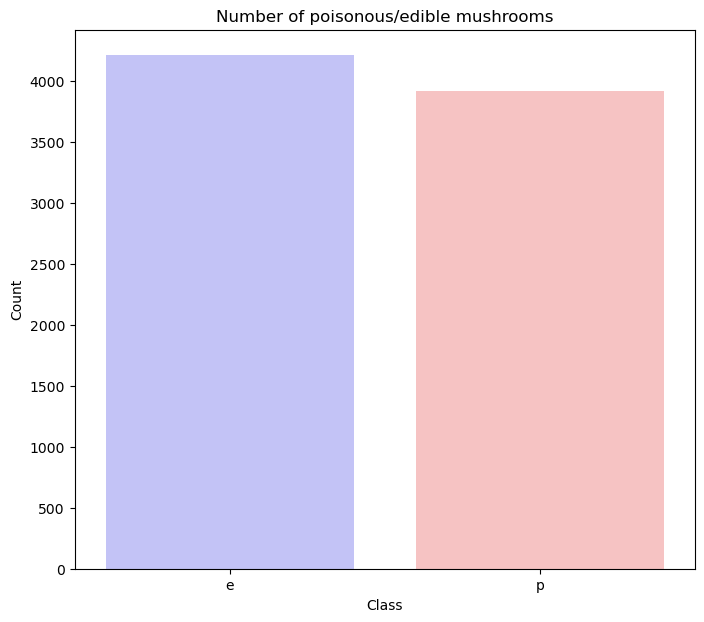

In [6]:
#Graphical representation of the data to understand the data better by 'class'

count = path['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="bwr")
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of poisonous/edible mushrooms')
plt.show()

In [7]:
X = path.drop('class', axis=1)
y = path['class']

labelencoder = LabelEncoder()
for col in X.columns:
    X[col] = labelencoder.fit_transform(X[col])

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [8]:
#Checking if we have converted the data correctly
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [9]:
path.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Trying without Dummies first

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression

In [11]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# We use iteartion of 1000 to get the best results because the default value of 100 is not enough to get the best results


LogisticRegression(max_iter=1000)

# Checking the accuracy of the model on the training data LR

In [12]:
print("Training Data Results :\n")
accuracyLR = accuracy_score(y_train, logreg.predict(X_train))
print('Accuracy Score:', round(accuracyLR, 4), '\n')
print('Classification Report:\n', classification_report(y_train,  logreg.predict(X_train)), '\n')
confusion_matrix(y_train, logreg.predict(X_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, logreg.predict(X_train)), '\n')

Training Data Results :

Accuracy Score: 0.9517 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      3365
           1       0.96      0.94      0.95      3134

    accuracy                           0.95      6499
   macro avg       0.95      0.95      0.95      6499
weighted avg       0.95      0.95      0.95      6499
 

Confusion Matrix:
 [[3234  131]
 [ 183 2951]] 



# Checking the accuracy of the model on the test data LR

In [13]:
print("Testing Data Results :\n")
accuracyTEST = accuracy_score(y_test, logreg.predict(X_test))
print('Accuracy Score:', round(accuracyTEST, 4), '\n')
print('Classification Report:\n', classification_report(y_test, logreg.predict(X_test)), '\n')
print("Cross-Validation Results:")
statsTEST = cross_val_score(logreg, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:', round(statsTEST.mean(), 4))
print('Standard Deviation:', round(statsTEST.std(), 4))

Testing Data Results :

Accuracy Score: 0.9477 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625
 

Cross-Validation Results:
Average Accuracy: 0.9385
Standard Deviation: 0.0192


# Graphing the Logistic Regression Model Training Data Results

In [14]:
#replace 

uniq = path['odor'].unique()
print(uniq)

['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']


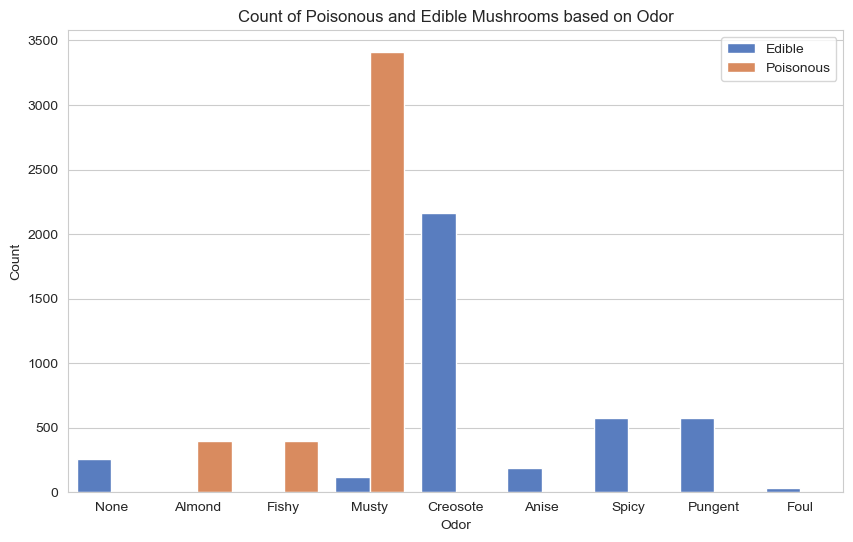

In [15]:
# Temporary mapping dictionaries
odor_mapping = {0: 'Almond', 1: 'Anise', 2: 'Creosote', 3: 'Fishy', 4: 'Foul', 5: 'Musty', 6: 'None', 7: 'Pungent', 8: 'Spicy'}
class_mapping = {0: 'Poisonous', 1: 'Edible'}

# Replace the encoded values in X['odor'] with their corresponding names using list comprehension
X_odor_names = np.array([odor_mapping[val] for val in X['odor']])

# Replace the target labels (0 and 1) with their corresponding names using list comprehension
y_class_names = np.array([class_mapping[val] for val in y])

# Plot the countplot with the mapped names
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x=X_odor_names, hue=y_class_names, palette='muted')  # Assuming y contains the target labels (class)
plt.title('Count of Poisonous and Edible Mushrooms based on Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()


In [16]:
# Create a DataFrame with odor names and corresponding class labels
odor_df = pd.DataFrame({'Odor': X_odor_names, 'Class': y_class_names})

# Group by odor and class, and count the occurrences of each class
odor_class_counts = odor_df.groupby(['Odor', 'Class']).size().unstack(fill_value=0)

# Calculate the total count of each odor category
odor_total_counts = odor_class_counts.sum(axis=1)

# Calculate the percentage of each class within each odor category
odor_class_percentages = odor_class_counts.div(odor_total_counts, axis=0) * 100

print(odor_class_percentages)


Class         Edible   Poisonous
Odor                            
Almond      0.000000  100.000000
Anise     100.000000    0.000000
Creosote  100.000000    0.000000
Fishy       0.000000  100.000000
Foul      100.000000    0.000000
Musty       3.401361   96.598639
None      100.000000    0.000000
Pungent   100.000000    0.000000
Spicy     100.000000    0.000000


# Support Vector Machines

In [17]:
svm = SVC(random_state=50, gamma='auto', probability=True)
svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True, random_state=50)

# Checking the accuracy of the model on the training data SVM

In [18]:
print("Training Data Results :\n")
accuracySVMT = accuracy_score(y_train, svm.predict(X_train))
print('Accuracy Score:', round(accuracySVMT, 4), '\n')
print('Classification Report:\n', classification_report(y_train, svm.predict(X_train)), '\n')

# Perform cross-validation
print("Cross-Validation Results:")
stats = cross_val_score(svm, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:', round(stats.mean(), 4))
print('Standard Deviation:', round(stats.std(), 4))


Training Data Results :

Accuracy Score: 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00      1.00      3134

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499
 

Cross-Validation Results:
Average Accuracy: 1.0
Standard Deviation: 0.0


# Checking the accuracy of the model on the testing data SVM

In [19]:
print("Test Data Results:\n")
test_accuracy = accuracy_score(y_test, svm.predict(X_test))
print('Accuracy Score: {0:.4f}\n'.format(test_accuracy))
print('Classification Report:\n{}\n'.format(classification_report(y_test, svm.predict(X_test))))


Test Data Results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625




# Graphing SVM


# Random Forest Classifier 

In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
y_pred = model.predict(X_test)

# Testing Accuracy of the test data

In [23]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion)
cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print("Cross-Validation Results:")
stats = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:', round(stats.mean(), 4))
print('Standard Deviation:', round(stats.std(), 4))

Accuracy: 100.00%
[[843   0]
 [  0 782]]
Cross-Validation Results:
Average Accuracy: 1.0
Standard Deviation: 0.0


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

